In [1]:
import numpy as np
np.random.seed(0)

from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.initializers import glorot_uniform

from sklearn.model_selection import train_test_split
import tensorflow as tf
# Configure keras backend to run on CPU
tf.config.set_visible_devices([], 'GPU')

import argparse
from datetime import datetime

from utils import *
from parameters import FLAGS
from preprocessing import review_to_indices, embedding_layer_glove

from models.uni_2_LSTM import Uni_2_LSTM
from models.bi_2_LSTM import Bi_2_LSTM
from models.cnn import CNN1


Parameters:
	dev_sample_percentage: 0.05
	data_file: /home/ubuntu/cs230_project/data/amazon_reviews_us_Electronics_v1_00.tsv
	word2vec_file: /home/ubuntu/cs230_project/data/glove.6B.100d.txt
	min_total_votes: 10
	max_review_word_count: 200
	keep_start_of_longer_reviews: True
	batch_size: 64
	num_epochs: 20
	debug_mode: False


In [2]:
X, Y = load_data(FLAGS.data_file,
                 FLAGS.min_total_votes,
                 FLAGS.max_review_word_count,
                 FLAGS.keep_start_of_longer_reviews)

X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=FLAGS.dev_sample_percentage, random_state=42)


Loading data ...
Chunk loaded. Found 136128 data points with >= 10 total votes.


In [8]:
print(f'Examples in X_train: {X_train.shape[0]}')
print(f'Examples in X_dev:   {X_dev.shape[0]}')

Examples in X_train: 129321
Examples in X_dev:   6807


In [9]:
for idx in range(3):
    print(X_train[idx], '\n', Y_train[idx])
    print('\n\n')

print('#'*50, '\n\n')

for idx in range(3):
    print(X_dev[idx], '\n', Y_dev[idx])
    print('\n\n')

I have several VHS movies that are not available on DVD, and I have been trying to backup my collection to DVD before VHS becomes obsolete. DVRs simply won't record Macrovision or copy-protected recordings, but the Grex Video Stabilizer solved the problem perfectly. I followed the guidelines on the Grex website ( xdimax.com/grex/grex.html ), and it performed exactly as advertised. The quality of the copy was just as good as the original. I highly recommend Grex as the solution for anyone trying to rescue a VHS collection. 
 1.0



I purchased the Crosley LP-to-CD from Brookstone and after I got it home I was astonished to discover how cheap a product costing several hundred dollars could be.  The turntable is awful.  If you bought a turntable for $25 you would expect it to be better than this.  The tone arm is not properly balanced and worst of all the speed is not consistent and is not adjustbale.  This product is virtually worthless for converting LP's to CD's if you have any senstiv

In [3]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs(FLAGS.word2vec_file)


Creating word embeddings matrix ...
Done


In [10]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = review_to_indices(X1, word_to_index, max_review_word_count=5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [4]:
model_biLSTM = Bi_2_LSTM((FLAGS.max_review_word_count, ),
                         word_to_vec_map,
                         word_to_index,
                         lstm_units=[32, 64])
model_biLSTM.summary()

Model: "bi_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          40000100  
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 64)           34048     
_________________________________________________________________
dropout (Dropout)            (None, 200, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 12

In [5]:
model_cnn1 = CNN1((FLAGS.max_review_word_count, ),
                  word_to_vec_map,
                  word_to_index,
                  FLAGS)
model_cnn1.summary()

Z1.shape (None, 198, 98, 8)
A1.shape (None, 198, 98, 8)
P1.shape (None, 99, 33, 8) 

Z2.shape (None, 97, 31, 16)
A2.shape (None, 97, 31, 16)
P2.shape (None, 49, 11, 16) 

Z3.shape (None, 45, 7, 32)
A3.shape (None, 45, 7, 32)
P3.shape (None, 23, 3, 32) 

F.shape (None, 2208)
out.shape (None, 1)
Model: "CNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 100)          40000100  
_________________________________________________________________
reshape (Reshape)            (None, 200, 100, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 98, 8)        80        
_________________________________________________________________
re_lu (ReLU)                 (N

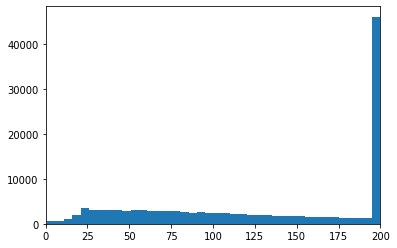

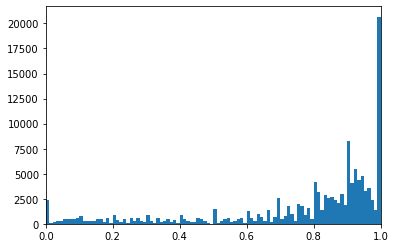

In [12]:
import matplotlib.pyplot as plt
plt.hist([len(X_train[i].split(' ')) for i in range(X_train.shape[0])], bins=40)
plt.xlim([0, 200])
plt.show()

plt.hist(Y_train, bins=100)
plt.xlim([0, 1])
plt.show()

In [ ]:
np.var(Y_train)

In [6]:
model_biLSTM.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model_cnn1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
X_train_indices = review_to_indices(X_train, word_to_index, FLAGS.max_review_word_count)
X_dev_indices   = review_to_indices(X_dev,   word_to_index, FLAGS.max_review_word_count)

model_cnn1.fit(X_train_indices, Y_train, epochs=FLAGS.num_epochs, batch_size=FLAGS.batch_size, shuffle=True,
               validation_data=(X_dev_indices, Y_dev))

Epoch 1/20
2021/2021 [==============================] - 568s 281ms/step - loss: 0.0640 - mse: 0.0640 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 2/20
2006/2021 [============================>.] - ETA: 4s - loss: 0.0618 - mse: 0.0618

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2021/2021 [==============================] - 569s 282ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 4/20
2021/2021 [==============================] - 568s 281ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 5/20
2021/2021 [==============================] - 566s 280ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 6/20
2021/2021 [==============================] - 566s 280ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 7/20
2021/2021 [==============================] - 569s 282ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 8/20
1156/2021 [================>.............] - ETA: 3:58 - loss: 0.0578 - mse: 0.0578

In [ ]:
date = 'd'+'_'.join(datetime.now().__str__()[0:10].split('-'))
time = 'h'+'_'.join(datetime.now().__str__()[11:19].split(':'))
datetime = date+time
model_cnn1.save('trained_models/model_cnn1'+datetime+'.h5')